The project was done by

Ilya Demskiy, 1st group

Alex Nikolaenko, 1st group

Roman Savin, 1st group

# Imports

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt 
import plotly.graph_objects as go


from scipy.stats import norm
from scipy.optimize import curve_fit
from sktime.utils.plotting import plot_series
from sktime.split import temporal_train_test_split

from statsmodels.tsa.seasonal import MSTL
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sktime.forecasting.ets import AutoETS
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error


# Just importing the necessary tools for the project 🦔


# Problem 1. Data

For our project we have chosen data on the number of requests of the word "Пиво" in Yandex search system; data is present both in relative frequency and in absolute values(number of searches)

In [4]:
# Obtaining Data and correcting it
# The data was obtaiened from: https://wordstat.yandex.ru/?region=all&view=graph&words=пиво 
# From 01.01.2018 to 01.11.2024


# Download data
df=pd.read_csv("Data_Translated",sep=';')

# Transform Date Series
df['Date'] = pd.to_datetime(df['Date'], format='%B %Y')
df['Freq'] = df['Freq'].astype(float)
df['ABS_Value'] = df['ABS_Value'].astype(int)
df = df.sort_values(by='Date')



# Problem 2. Visualization + Split Data

In [5]:

# Visualisation

# 1 Percentage of "Пиво" requests among all search requests in Yandex, per month (0.03 on the graph corresponds to 0.03% of all requests)
fig1 = px.line(df, 
               x='Date', 
               y='Freq', 
               markers=True, 
               template="simple_white", 
               labels={'Date': 'Date', 'Freq': 'Proportion of all requests'})

fig1.update_traces(line=dict(color='#F8C000', width=4)) 

fig1.update_layout(
    title="Proportion of All Requests Over Time",
    title_font=dict(family="serif", size=24, color="brown"),
    xaxis_title="Date",
    yaxis_title="Proportion of all requests",
    xaxis_tickformat="%b %Y",
    xaxis=dict(showgrid=False, tickangle=45), 
    yaxis=dict(showgrid=True),
    template="plotly",
    plot_bgcolor="ivory",
    paper_bgcolor="#FFFBF0", 
    font=dict(family="serif", color="brown"),
    showlegend=False
)

fig1.show()

In [6]:
# 2 Total number of "Пиво" requests in Yandex, per month
fig2 = px.line(df, 
               x='Date', 
               y='ABS_Value', 
               markers=True, 
               template="simple_white", 
               labels={'Date': 'Date', 'ABS_Value': 'Number of requests'})

fig2.update_traces(line=dict(color='#F8C000', width=4)) 

fig2.update_layout(
    title='Number of "Пиво" Requests Over Time',
    title_font=dict(family="serif", size=24, color="brown"),
    xaxis_title="Date",
    yaxis_title="Number of requests",
    xaxis_tickformat="%b %Y",
    xaxis=dict(showgrid=False, tickangle=45), 
    yaxis=dict(showgrid=True),
    template="plotly",
    plot_bgcolor="ivory",
    paper_bgcolor="#FFFBF0", 
    font=dict(family="serif", color="brown"),
    showlegend=False
)

fig2.show()

In [7]:
# 3 Data is the same as on the first graph, but only available points without interpolation, for clarity
fig3 = px.scatter(df, 
                  x='Date', 
                  y='Freq',  
                  template="simple_white", 
                  labels={'Date': 'Date', 'Freq': 'Proportion of all requests'})

fig3.update_traces(marker=dict(size=10, color='#F8C000')) 

fig3.update_layout(
    title="Proportion of All Requests Over Time",
    title_font=dict(family="serif", size=24, color="brown"),
    xaxis_title="Date",
    yaxis_title="Proportion of all requests",
    xaxis_tickformat="%b %Y",
    xaxis=dict(showgrid=False, tickangle=45), 
    yaxis=dict(showgrid=True),
    template="plotly",
    plot_bgcolor="ivory",
    paper_bgcolor="#FFFBF0", 
    font=dict(family="serif", color="brown"),
    showlegend=False
)

fig3.show()

In [8]:
# 4 Same relative frequency graph, but now it is a Bar-chart(we present data about Beer in the form of Bar-chart :D)
fig4 = px.bar(df, 
              x='Date', 
              y='Freq', 
              template="simple_white", 
              labels={'Date': 'Date', 'Freq': 'Proportion of all requests'})
fig4.update_traces(marker=dict(color='#F8C000'))

fig4.update_layout(
    title="Proportion of All Requests Over Time",
    title_font=dict(family="serif", size=24, color="brown"),
    xaxis_title="Date",
    yaxis_title="Proportion of all requests",
    xaxis_tickformat="%b %Y",
    xaxis=dict(showgrid=False, tickangle=45), 
    yaxis=dict(showgrid=True),
    template="plotly",
    plot_bgcolor="ivory",
    paper_bgcolor="#FFFBF0", 
    font=dict(family="serif", color="brown"),
    showlegend=False
)

fig4.show()

In [9]:
# 5 Again, relative frequency, but now the graph looks like beer itself 🤔
fig_area = px.area(df, 
                   x='Date', 
                   y='Freq', 
                   template="simple_white", 
                   labels={'Date': 'Date', 'Freq': 'Proportion of all requests'})

fig_area.update_traces(fill='tozeroy', line=dict(color='#F8C000', width=4)) 

fig_area.update_layout(
    title="Proportion of All Requests Over Time",
    title_font=dict(family="serif", size=24, color="brown"),
    xaxis_title="Date",
    yaxis_title="Proportion of all requests",
    xaxis_tickformat="%b %Y",
    xaxis=dict(showgrid=False, tickangle=45), 
    yaxis=dict(showgrid=True),
    template="plotly",
    plot_bgcolor="ivory",
    paper_bgcolor="#FFFBF0", 
    font=dict(family="serif", color="brown"),
    showlegend=False
)

fig_area.show()

In [10]:
# 6 Histogram which shows the number of month for a given frequency (clear demonstration of mode)
fig_hist = px.histogram(df, 
                        x='Freq', 
                        template="simple_white", 
                        labels={'Freq': 'Proportion of all requests'})

fig_hist.update_traces(marker=dict(color='#F8C000'))

fig_hist.update_layout(
    title="Proportion of All Requests Over Time",
    title_font=dict(family="serif", size=24, color="brown"),
    xaxis_title="Proportion of requests",
    yaxis_title="Number of months",
    xaxis_tickformat="%b %Y",
    xaxis=dict(showgrid=False, tickangle=45), 
    yaxis=dict(showgrid=True),
    template="plotly",
    plot_bgcolor="ivory",
    paper_bgcolor="#FFFBF0", 
    font=dict(family="serif", color="brown"),
    showlegend=False
)

fig_hist.show()

In [11]:
# Split data. We take 70% for train and 30% for test

abs_series = pd.DataFrame(df['ABS_Value'])
freq_series = pd.DataFrame(df['Freq'])
freq_series.index = pd.DatetimeIndex(df["Date"])
abs_series.index = pd.DatetimeIndex(df["Date"])
freq_series.name = 'Freq'

train_obs = int(round(len(abs_series) * 0.7, 0))

y_train, y_test = temporal_train_test_split(abs_series, train_size = train_obs)

# Problem 3. Trend, Seasonal Part, Noise


In [16]:
#Apply decomposition for train data. Absolute Values

mstl = MSTL(y_train["ABS_Value"], periods=12)
res = mstl.fit()

trend = res.trend
seasonal = res.seasonal
residual = res.resid

trend_values = trend.values
seasonal_values = seasonal.values
residual_values = residual.values

In [18]:
# Add Trend line
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=y_train.index, y=trend_values, mode='lines', name='Trend'))

# Add Seasonal line
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=y_train.index, y=seasonal_values, mode='lines', name='Seasonal'))


# Add Residual line
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=y_train.index, y=residual_values, mode='lines', name='Residuals'))

# Update layout
fig1.update_layout(title='Trend',
                  xaxis_title='Time',
                  yaxis_title='Values',
                  legend_title='Components')

fig2.update_layout(title='Seasonal',
                  xaxis_title='Time',
                  yaxis_title='Values',
                  legend_title='Components')

fig3.update_layout(title='Residuals',
                  xaxis_title='Time',
                  yaxis_title='Values',
                  legend_title='Components')

# Show the plot
fig1.show() # Shows the trend line found by the ETS decomposition
fig2.show() # Shows the seasonal part of time series (period is 12 months), found by the ETS decomposition
fig3.show() # Graph for the residuals found by the ETS decomposition


# Problem 4. Gradient Boosing. Forecasting


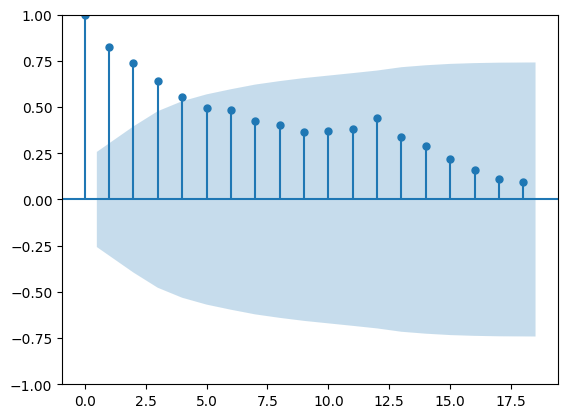

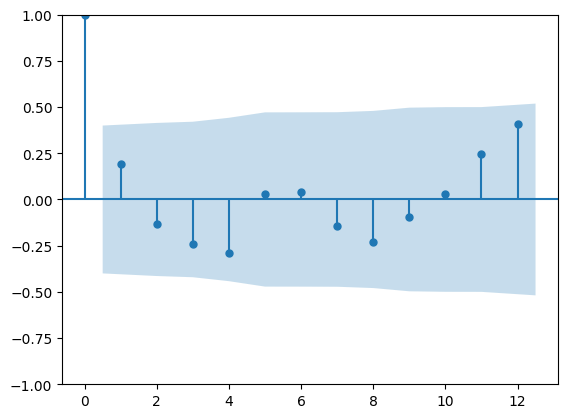

In [19]:
# #The following checks for presence of Autocorrelation in series and increments.
train=y_train
test=y_test
plot_acf(train,title=None)
plt.show()

plot_acf((test.shift(1).dropna()-test).dropna(),title=None)
plt.show()

#Therefore, makes sense to use previous observation as feautures 
#In particual, we will use y[t-1] and y[t-2] for prediction of y[t]

In [20]:
# Assuming y_train is a Pandas Series

data_GB =pd.DataFrame(train).copy(True)
data_GB['y_lag1'] = data_GB['ABS_Value'].shift(1)
data_GB['y_lag2'] = data_GB['ABS_Value'].shift(2)
data_GB = data_GB.dropna()
data_GB['Constant']=1



# Define features (X) and target variable (y)
X = data_GB[['y_lag1', 'y_lag2','Constant']]
y = data_GB['ABS_Value']




# Initialize and fit the model
model = GradientBoostingRegressor()
model.fit(X, y)

#Obtain predictions
data_GB_test=pd.DataFrame(df[['Date','ABS_Value']][(len(y_train)-2):]).copy(True)
data_GB_test['y_lag1'] = data_GB_test['ABS_Value'].shift(1)
data_GB_test['y_lag2'] = data_GB_test['ABS_Value'].shift(2)
data_GB_test = data_GB_test.dropna()
data_GB_test['Constant']=1

X_data=data_GB_test[['y_lag1','y_lag2','Constant']]

data_GB_test['Predict']= model.predict(X_data)
y_pred_gb = model.predict(X_data)

fig = go.Figure()
fig.add_trace(go.Scatter(x=data_GB_test.index, y=data_GB_test['Predict'], mode='lines', name='Predictions'))
fig.add_trace(go.Scatter(x=data_GB_test.index, y=data_GB_test['ABS_Value'], mode='lines', name='Observations'))

fig.update_layout(title='Predictions VS Observations',
                  xaxis_title='Time',
                  yaxis_title='Values',
                  legend_title='Components')
fig.show()


# Problem 5. ETS forecast


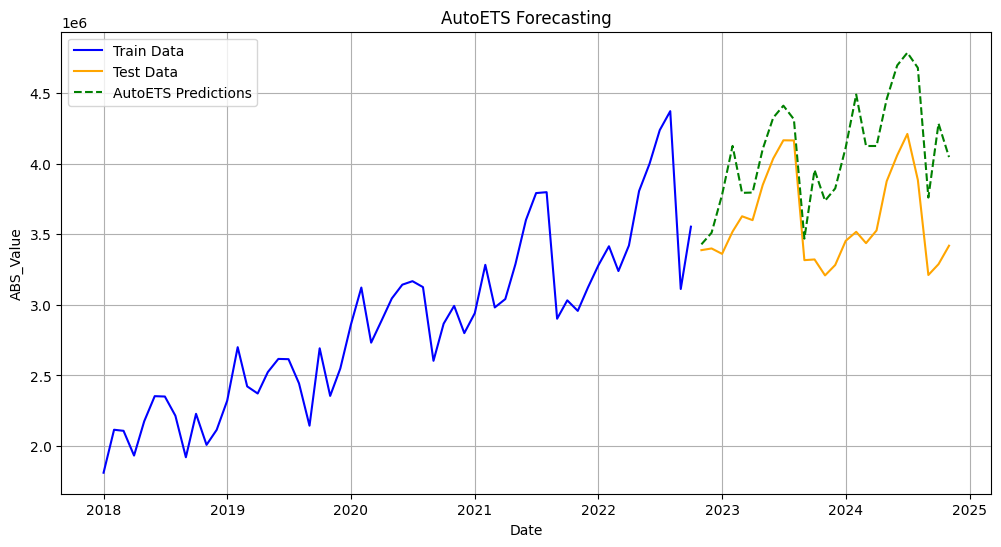

In [21]:
y = df['ABS_Value']
time_index = df['Date']

# Split the data into train and test (70/30 split)
y_train, y_test, time_train, time_test = temporal_train_test_split(y, time_index, test_size=0.3)

# Initialize and fit AutoETS model on training data
model = AutoETS(auto=True, sp=12, n_jobs=-1)  # Seasonal period = 12 for monthly data
model.fit(y_train)

# Forecast the test period
fh = [i for i in range(1, len(y_test) + 1)]  # Forecasting horizon for test data length
y_pred = model.predict(fh)
y_pred_ets = y_pred
# Evaluate performance using MAPE (Mean Absolute Percentage Error)
# mape = mean_absolute_percentage_error(y_test, y_pred)
# print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}")

# Plot the results: Train data, Test data, and Predictions
plt.figure(figsize=(12, 6))
plt.plot(time_train, y_train, label='Train Data', color='blue')
plt.plot(time_test, y_test, label='Test Data', color='orange')
plt.plot(time_test, y_pred, label='AutoETS Predictions', color='green', linestyle='--')
plt.title("AutoETS Forecasting")
plt.xlabel("Date")
plt.ylabel("ABS_Value")
plt.legend()
plt.grid()
plt.show()

# Problem 6. Fourier Series 

It sounds reasonable to apply periodic functions to periodic data

$\large y_t = T_t + S_t + e_t$

where  

 T_t: Trend component 
 
 S_t: Seasonal component 
 
 e_t: error component

We can model Seasonal component by Fourier Series which in general form is given by:

$\large T_{seasonal} = a_0 + \sum_i \alpha_i sin(i \omega_1 t + \theta) + \sum_i \beta_i cos(i \omega_2 t + \phi)$

where 

$\alpha_i, \beta_i, theta $ are to be fit

$\omega_i$  accounts for periodicity

To avoid overfitting  we will use only $sin(i \omega_1 t + \theta)$ expantion.

This results in

$\large \bar{T_t} = a + bt + \alpha sin(\omega t + \theta)=a+bt+a_1 sin(\omega t)+b_1 cos(\omega t)$

where a+bt models trend part (safely assume its linearity due to Problem 3 decomposition)

Essentialy we have to fit 

$\Large \hat{\beta} \in argmin_\beta S(\beta) \equiv argmin_\beta \sum_{i-1}^N \left[ y_i - f(x_i, \beta) \right]^2$
 
We will apply Levenberg-Marquardt algorithm (LMA) algorithm which involves Gradient Boosting Method.

This can be done via scipy.optimize.curve_fit

We will set $\omega=\frac{2\pi}{12}
$ which accounts for monthly seasonality



Fitted parameters: a=1956900.3418998132, b=31291.036262083908, a1=-152001.5642799385, b1=147273.43151924116


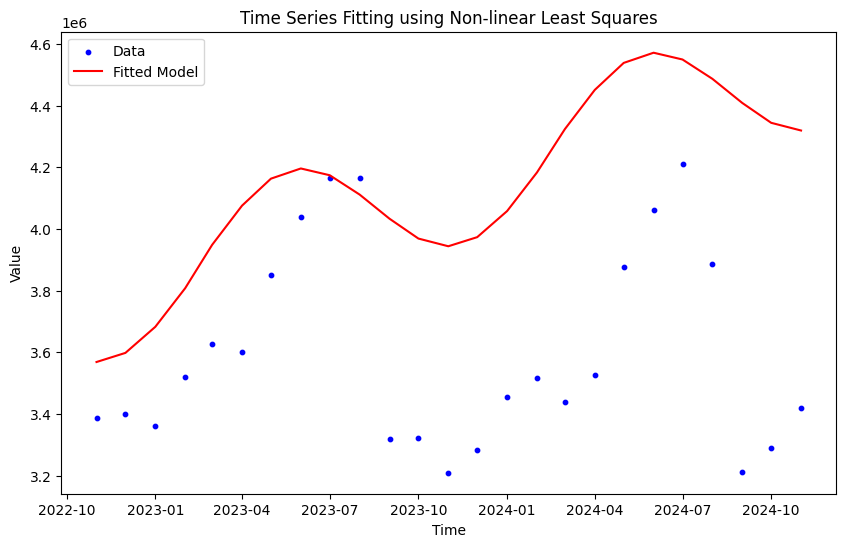

In [22]:

def RSS(y, y_pred):
    return np.sqrt( (y - y_pred)**2 ).sum()

# Define the model function
def model_fit(x, a, b, a1, b1):
    omega = 2* np.pi / 12
    y_pred = a + b * x + a1 * np.cos(omega * x) + b1 * np.sin(omega * x)
    return y_pred

x_data=list(time_train.index)
y_data=list(y_train)

# Fit the model using curve_fit
initial_guess = [1, 50000, 1, 1,]  # Initial guess for parameters [a, b, a1, b1]
params, covariance = curve_fit(model_fit, x_data, y_data, p0=initial_guess)

# Extract fitted parameters
a_fit, b_fit, a1_fit, b1_fit = params

# Print fitted parameters
print(f"Fitted parameters: a={a_fit}, b={b_fit}, a1={a1_fit}, b1={b1_fit}")

# Predict values using the fitted model
x_data_test=list(time_test.index)
y_pred = model_fit(np.array(x_data_test), *params)
y_pred_fourie = y_pred

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(time_test, y_test, label='Data', color='blue', s=10)
plt.plot(time_test, y_pred, label='Fitted Model', color='red')
plt.title('Time Series Fitting using Non-linear Least Squares')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Problem 6.1 Short Resume
Even now (without quantitative comparison) we can observe that Autoregression Model is the best one compared to Fourier and ETS. It is expcted due to severe autocorrellation presence in data which was checked in Problem 4.
  
The Fourier series approach due to seasonality of data (sin(x) and cos(x)), but presence of increasing scale of seasonality with time and autocorrelation resulted in bad forecasting power. Yet, fourier series are often used for weather forecasting and other life phenomena.

AutoETS provides middle results in terms of perfomance. Perhaps, they can further be enhanced by choice of appropriate specification of ETS model, but simple ETS model is far from perfect.

# Problem 7. Comparasion


Here we use three metrics (Mean Absolute Error, Mean Squared Error and Root Mean Squared Error) to find out which model fits the data the best, the estimates are present in graphs and the result of the comparison is in the cell below

Gradient Boosting Metrics:
MAE: 185899.093
MSE: 55690818335.264
RMSE: 235989.022

ETS Model Metrics:
MAE: 480970.018
MSE: 298827242347.801
RMSE: 546650.933

Fourier Series Model Metrics:
MAE: 537841.926
MSE: 385402102390.142
RMSE: 620807.621

               Model            MAE           MSE           RMSE
0  Gradient Boosting  185899.092594  5.569082e+10  235989.021641
1          ETS Model  480970.018161  2.988272e+11  546650.932815
2     Fourier Series  537841.925898  3.854021e+11  620807.621079


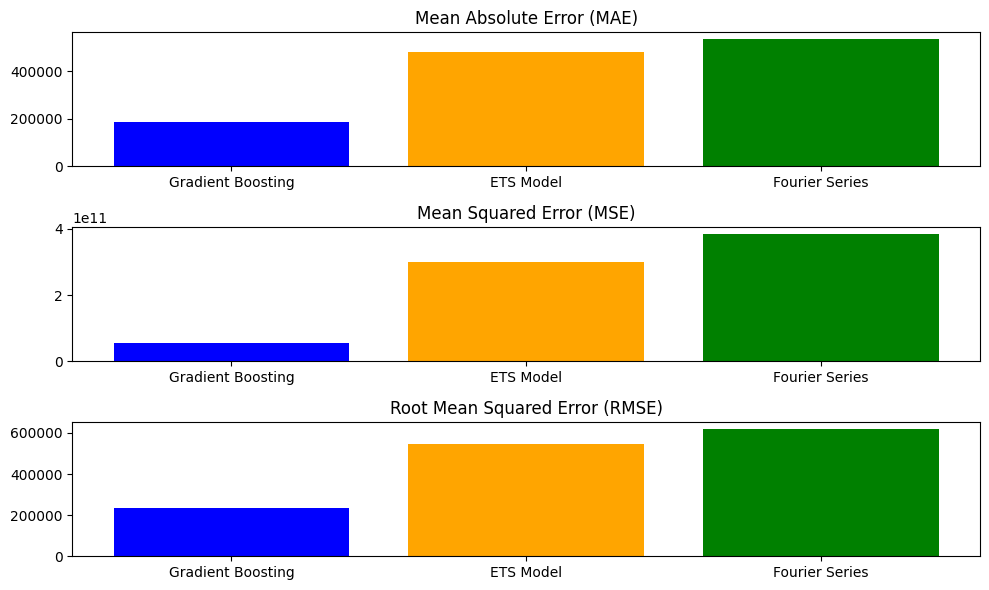

The best forecasting model is: Gradient Boosting


In [23]:

def calculate_metrics(actual, predicted, model_name):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    print(f"{model_name} Metrics:\nMAE: {mae:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\n")
    return mae, mse, rmse

# Actual data for last 30%
test_actual = np.array(y_test)
gb_forecast = np.array(y_pred_gb)
ets_forecast = np.array(y_pred_ets)
fourier_forecast = np.array(y_pred_fourie)

# Calculate metrics for each model
gb_metrics = calculate_metrics(test_actual, gb_forecast, "Gradient Boosting")
ets_metrics = calculate_metrics(test_actual, ets_forecast, "ETS Model")
fourier_metrics = calculate_metrics(test_actual, fourier_forecast, "Fourier Series Model")

# Organize metrics into a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': ['Gradient Boosting', 'ETS Model', 'Fourier Series'],
    'MAE': [gb_metrics[0], ets_metrics[0], fourier_metrics[0]],
    'MSE': [gb_metrics[1], ets_metrics[1], fourier_metrics[1]],
    'RMSE': [gb_metrics[2], ets_metrics[2], fourier_metrics[2]]
})

# Display the comparison table
print(comparison_df)

# Plot the metrics for visualization
plt.figure(figsize=(10, 6))

# Bar chart for MAE
plt.subplot(3, 1, 1)
plt.bar(comparison_df['Model'], comparison_df['MAE'], color=['blue', 'orange', 'green'])
plt.title('Mean Absolute Error (MAE)')

# Bar chart for MSE
plt.subplot(3, 1, 2)
plt.bar(comparison_df['Model'], comparison_df['MSE'], color=['blue', 'orange', 'green'])
plt.title('Mean Squared Error (MSE)')

# Bar chart for RMSE
plt.subplot(3, 1, 3)
plt.bar(comparison_df['Model'], comparison_df['RMSE'], color=['blue', 'orange', 'green'])
plt.title('Root Mean Squared Error (RMSE)')

plt.tight_layout()
plt.show()

# Choose the best model based on RMSE (or another metric of your choice)
best_model = comparison_df.loc[comparison_df['RMSE'].idxmin(), 'Model']
print(f"The best forecasting model is: {best_model}")


# HEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOGHEDGEHOG


The fun part continues here 🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔🦔

In [29]:
import random

def draw_christmas_tree_with_hedgehog(tree_height, hedgehog_height):
    if tree_height <= 0 or tree_height > 46:
        print("Tree height must be a positive integer. Max height is 46")
        return

    if hedgehog_height <= 0 or hedgehog_height > 46:
        print("Hedgehog height must be a positive integer. Max height is 46")
        return

    # Draw the Christmas tree
    for i in range(tree_height):
        if i <= 3:
            spaces = " " * (tree_height - i - 1)
            stars = "*" * (2 * i + 1)
        else:
            spaces = " " * (tree_height - i - 1)
            stars = "*" * (2 * i) + '♡'
            l = list(stars)
            random.shuffle(l)
            stars = ''.join(l)
        print(spaces + stars + spaces)

    # Draw the trunk of the tree
    trunk_spaces = " " * (tree_height - 2)
    print(trunk_spaces + "| |" + trunk_spaces)

    # Draw a small hedgehog below the tree
    def draw_hedgehog():
        # Top of the hedgehog's body (round spikes)
        for i in range(hedgehog_height):
            if i <= hedgehog_height/5:
                pass
            else:
                spaces = " " * (tree_height - i - 1)
                spikes = "*" * (2 * i + 1)
                spike_face = "*" * (2 * i - 5)
                print(spaces + spikes + spaces)

        # Face of the hedgehog
        face_spaces = " " * (tree_height - 2)
        print(spaces + spike_face + "(◕ ● ◕)" + face_spaces)

    # Draw the hedgehog
    draw_hedgehog()

In [28]:
nh = int(input('Input height of tree: '))
nt = int(input('Input height of hedgehog: '))
draw_christmas_tree_with_hedgehog(nh, nt)

         *         
        ***        
       *****       
      *******      
     ******♡**     
    *********♡*    
   ****♡********   
  **♡************  
 *************♡*** 
*♡*****************
        | |        
      *******      
     *********     
    ***********    
   *************   
  ***************  
 ***************** 
*******************
*************(◕ ● ◕)        


Happy New Year! 🦔